# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

# from sklearn.model_selection import train_test_split
# from sklearn import metrics
# from sklearn.ensemble import RandomForestClassifier

# from scipy.stats import ks_2samp
import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy

%matplotlib inline

In [2]:
df = pd.read_csv('previsao_de_renda.csv')
df

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,16006,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14996,14996,2016-03-01,3722,F,False,True,0,Pensionista,Superior completo,Solteiro,Casa,57,NaN,1.0,10093.45
14997,14997,2016-03-01,6194,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,14998,2016-03-01,4922,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).
2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?
3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?
4. Rode um modelo *stepwise*. Avalie o $R^2$ na vase de testes. Qual o melhor resultado?
5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?
6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.
7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

In [4]:
# 1: Separe a base em treinamento e teste (25% para teste, 75% para treinamento).
X = df.drop(columns = ["renda", "data_ref", "estado_civil", "tipo_residencia", "tipo_renda","educacao", "posse_de_veiculo", "posse_de_imovel","sexo"])
X = pd.get_dummies(X, drop_first = True)
print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   id_cliente             15000 non-null  int64  
 2   qtd_filhos             15000 non-null  int64  
 3   idade                  15000 non-null  int64  
 4   tempo_emprego          12427 non-null  float64
 5   qt_pessoas_residencia  15000 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 703.3 KB
None


,Unnamed: 0,id_cliente,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia
0,0,15056,0,26,6.602740,1.0
1,1,9968,0,28,7.183562,2.0
2,2,4312,0,35,0.838356,2.0
3,3,10639,1,30,4.846575,3.0
4,4,7064,0,33,4.293151,1.0


In [5]:
# 1:

novo_data = pd.DataFrame(df, columns=["renda", "id_cliente", "idade", "qtd_filhos", "qt_pessoas_residencia"])
novo_data

,renda,id_cliente,idade,qtd_filhos,qt_pessoas_residencia
0,8060.34,15056,26,0,1.0
1,1852.15,9968,28,0,2.0
2,2253.89,4312,35,0,2.0
3,6600.77,10639,30,1,3.0
4,6475.97,7064,33,0,1.0
...,...,...,...,...,...
14995,7990.58,16006,48,0,1.0
14996,10093.45,3722,57,0,1.0
14997,604.82,6194,45,0,2.0
14998,3352.27,4922,36,0,2.0


In [6]:
# 1:

X = df[["id_cliente", "idade", "qtd_filhos", "qt_pessoas_residencia"]]
X

,id_cliente,idade,qtd_filhos,qt_pessoas_residencia
0,15056,26,0,1.0
1,9968,28,0,2.0
2,4312,35,0,2.0
3,10639,30,1,3.0
4,7064,33,0,1.0
...,...,...,...,...
14995,16006,48,0,1.0
14996,3722,57,0,1.0
14997,6194,45,0,2.0
14998,4922,36,0,2.0


In [7]:
# 1:

train_test_split(X)

[       id_cliente  idade  qtd_filhos  qt_pessoas_residencia
 529          2826     61           0                    2.0
 12703        5865     29           1                    3.0
 1990        10522     28           0                    1.0
 14900        2297     57           0                    2.0
 6923        11043     61           0                    1.0
 ...           ...    ...         ...                    ...
 1669        16632     28           1                    2.0
 9968        14487     42           0                    2.0
 1115         8480     43           0                    2.0
 5725        13440     29           1                    3.0
 6593        14292     44           0                    2.0
 
 [11250 rows x 4 columns],
        id_cliente  idade  qtd_filhos  qt_pessoas_residencia
 1487         2501     62           0                    2.0
 14342       15595     32           1                    3.0
 6990         8621     37           0                   

In [8]:
# 1:

y = df[["renda"]]
y

,renda
0,8060.34
1,1852.15
2,2253.89
3,6600.77
4,6475.97
...,...
14995,7990.58
14996,10093.45
14997,604.82
14998,3352.27


In [9]:
# 2:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# 2:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f"MSE: {mse}")
print(f"Coeficientes: {ridge_model.coef_}")

MSE: 48740286.80161255
Coeficientes: [[ 2.87050323e-03  3.18514249e+01 -6.24092185e+02  9.98632795e+02]]


In [11]:
# 2:
ridge_model_0 = Ridge(alpha=0)
ridge_model_0.fit(X_train, y_train)
y_pred = ridge_model_0.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f"MSE: {mse}")
print(f"Coeficientes: {ridge_model_0.coef_}")

MSE: 48740290.167965636
Coeficientes: [[ 2.87035010e-03  3.18513080e+01 -6.24189694e+02  9.98713448e+02]]


In [12]:
# 2:
ridge_model = Ridge(alpha=0.001)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f"MSE: {mse}")
print(f"Coeficientes: {ridge_model.coef_}")

MSE: 48740290.13428623
Coeficientes: [[ 2.87035163e-03  3.18513092e+01 -6.24188718e+02  9.98712641e+02]]


In [13]:
# 2:
ridge_model = Ridge(alpha=0.005)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f"MSE: {mse}")
print(f"Coeficientes: {ridge_model.coef_}")

MSE: 48740289.99957184
Coeficientes: [[ 2.87035776e-03  3.18513139e+01 -6.24184818e+02  9.98709415e+02]]


In [14]:
# 2:
ridge_model = Ridge(alpha=0.05)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f"MSE: {mse}")
print(f"Coeficientes: {ridge_model.coef_}")

MSE: 48740288.484388374
Coeficientes: [[ 2.87042667e-03  3.18513665e+01 -6.24140936e+02  9.98673119e+02]]


In [15]:
# 2:
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f"MSE: {mse}")
print(f"Coeficientes: {ridge_model.coef_}")

MSE: 48740289.83118606
Coeficientes: [[ 2.87036541e-03  3.18513197e+01 -6.24179942e+02  9.98705382e+02]]


In [16]:
# 2:
ridge_model = Ridge(alpha=0.001)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f"MSE: {mse}")
print(f"Coeficientes: {ridge_model.coef_}")
print("")
print("Esse é o melhor modelo porque é o que apresenta o menor erro quadrático médio e por isso, está melhor ajustado aos dados.")

MSE: 48740290.13428623
Coeficientes: [[ 2.87035163e-03  3.18513092e+01 -6.24188718e+02  9.98712641e+02]]

Esse é o melhor modelo porque é o que apresenta o menor erro quadrático médio e por isso, está melhor ajustado aos dados.


In [17]:
# 3:
print(df.isnull().sum())

Unnamed: 0                  0
data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64


In [18]:
# 3:
df = df.dropna()

In [19]:
# 3:
print(df.isnull().sum())

Unnamed: 0               0
data_ref                 0
id_cliente               0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64


In [37]:
x = df.drop(["renda", "data_ref", "sexo", "tipo_renda", "educacao", "estado_civil", "tipo_residencia"], axis = 1).values

y = df["renda"].values

In [38]:
from sklearn.linear_model import Lasso

In [39]:
modelo1 = Lasso(alpha=0)
modelo1.fit(x, y)

C:\Users\victo\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\victo\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\victo\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.111e+11, tolerance: 9.821e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

Lasso(alpha=0)

In [40]:
score = modelo1.score(x, y)
score

0.1627990772350757

In [41]:
modelo2 = Lasso(alpha=0.1)
modelo2.fit(x, y)

Lasso(alpha=0.1)

In [42]:
score2 = modelo2.score(x, y)
score2

0.16279907281964878

In [43]:
modelo3 = Lasso(alpha=0.001)
modelo3.fit(x, y)

Lasso(alpha=0.001)

In [44]:
score3 = modelo2.score(x, y)
score3

0.16279907281964878

In [45]:
modelo4 = Lasso(alpha=0.005)
modelo4.fit(x, y)
score4 = modelo2.score(x, y)
score4

0.16279907281964878

In [46]:
modelo5 = Lasso(alpha=0.01)
modelo5.fit(x, y)
score5 = modelo2.score(x, y)
score5

0.16279907281964878

In [47]:
modelo6 = Lasso(alpha=0.05)
modelo6.fit(x, y)
score6 = modelo2.score(x, y)
score6

0.16279907281964878

In [48]:
lambdas = [0.001, 0.005,0.01, 0.05, 0.1]

In [49]:
scores = []

In [50]:
for i in range(len(lambdas)):
    modelo = Lasso(alpha=lambdas[i])
    modelo.fit(x, y)
    score = modelo.score(x, y)
    scores.append(score)

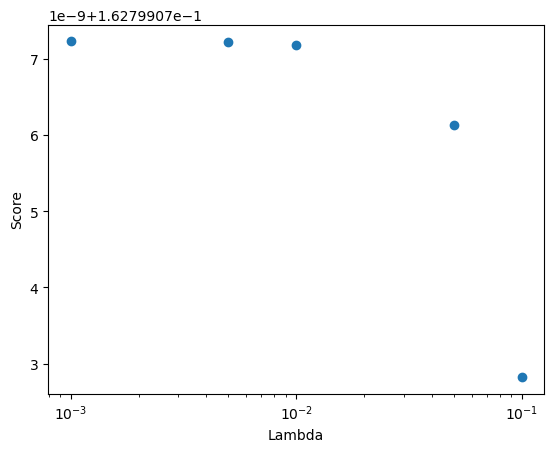

In [51]:
plt.scatter(lambdas, scores);
plt.xlabel("Lambda");
plt.ylabel("Score");
plt.xscale("log");

In [52]:
#Rode um modelo stepwise. Avalie o  𝑅2
#  na base de testes. Qual o melhor resultado?
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype=np.dtype('float64'))
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.index[new_pval.argmin()]
            included.append(best_feature)
            changed=True
            if verbose:
                 print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        print("#############")
        print(included)
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

variaveis = stepwise_selection(X, y)

print('resulting features:')
print(variaveis)

ValueError: endog and exog matrices are different sizes

In [53]:
# 5:
print("Na minha opinião o melhor modelo foi o RIDGE porque é o que consegui avaliar melhor os dados.")

Na minha opinião o melhor modelo foi o RIDGE porque é o que consegui avaliar melhor os dados.


In [57]:
# 6: Partindo dos modelos que você ajustou, tente melhorar o  𝑅2
# na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.

modelo = 'np.log(renda) ~ id_cliente + idade + qtd_filhos + qt_pessoas_residencia'

md = smf.ols(modelo, data=novo_data)

reg = md.fit_regularized(method='elastic_net',
            refit=True,
            L1_wt=1, # Para realizar uma regularização Ridge o valor de L1_wt precisa ser próximo de zero
            alpha=0.1)
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                    0.9312
Date:                Mon, 26 Feb 2024   Prob (F-statistic):              0.425
Time:                        03:57:06   Log-Likelihood:                -19423.
No. Observations:               15000   AIC:                         3.885e+04
Df Residuals:                   14997   BIC:                         3.888e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 8.23

In [59]:
# 6: Partindo dos modelos que você ajustou, tente melhorar o  𝑅2
# na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.

modelo = 'np.log(renda) ~ id_cliente + idade + qtd_filhos'

md = smf.ols(modelo, data=novo_data)

reg = md.fit_regularized(method='elastic_net',
            refit=True,
            L1_wt=1, # Para realizar uma regularização Ridge o valor de L1_wt precisa ser próximo de zero
            alpha=0.01)
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     10.89
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           8.11e-09
Time:                        03:57:49   Log-Likelihood:                -19403.
No. Observations:               15000   AIC:                         3.882e+04
Df Residuals:                   14996   BIC:                         3.885e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.1390      0.036    228.621      0.0

In [62]:
# 6: Partindo dos modelos que você ajustou, tente melhorar o  𝑅2
# na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.

modelo = 'np.log(renda) ~ id_cliente + idade'

md = smf.ols(modelo, data=novo_data)

reg = md.fit_regularized(method='elastic_net',
            refit=True,
            L1_wt=1, #Para realizar uma regularização Ridge o valor de L1_wt precisa ser próximo de zero
            alpha=0.001)
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                    0.9312
Date:                Mon, 26 Feb 2024   Prob (F-statistic):              0.425
Time:                        03:58:39   Log-Likelihood:                -19423.
No. Observations:               15000   AIC:                         3.885e+04
Df Residuals:                   14997   BIC:                         3.888e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.2359      0.032    255.359      0.0

In [64]:
# 6: Partindo dos modelos que você ajustou, tente melhorar o  𝑅2
# na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.

modelo = 'np.log(renda) ~ id_cliente + qtd_filhos'

md = smf.ols(modelo, data=novo_data)

reg = md.fit_regularized(method='elastic_net',
            refit=True,
            L1_wt=1, # Para realizar uma regularização Ridge o valor de L1_wt precisa ser próximo de zero
            alpha=0.01)
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     13.09
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           1.56e-08
Time:                        03:59:41   Log-Likelihood:                -19405.
No. Observations:               15000   AIC:                         3.882e+04
Df Residuals:                   14997   BIC:                         3.885e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.2060      0.015    550.956      0.0

In [65]:
# 6: Partindo dos modelos que você ajustou, tente melhorar o  𝑅2
# na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.

modelo = 'np.log(renda) ~ id_cliente + qtd_filhos'

md = smf.ols(modelo, data=novo_data)

reg = md.fit_regularized(method='elastic_net',
            refit=True,
            L1_wt=1, # Para realizar uma regularização Ridge o valor de L1_wt precisa ser próximo de zero
            alpha=0.05)
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.368
Date:                Mon, 26 Feb 2024   Prob (F-statistic):              0.255
Time:                        04:00:02   Log-Likelihood:                -19423.
No. Observations:               15000   AIC:                         3.885e+04
Df Residuals:                   14998   BIC:                         3.888e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.2289      0.014    570.685      0.0

In [66]:
# 6: Partindo dos modelos que você ajustou, tente melhorar o  𝑅2
# na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.

modelo = 'np.log(renda) ~ id_cliente + qtd_filhos'

md = smf.ols(modelo, data=novo_data)

reg = md.fit_regularized(method='elastic_net',
            refit=True,
            L1_wt=1, # Para realizar uma regularização Ridge o valor de L1_wt precisa ser próximo de zero
            alpha=0.005)
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     13.09
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           1.56e-08
Time:                        04:00:28   Log-Likelihood:                -19405.
No. Observations:               15000   AIC:                         3.882e+04
Df Residuals:                   14997   BIC:                         3.885e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.2060      0.015    550.956      0.0

In [67]:
# 6: 
print("Testei alguns modelos, alterando o valor do alpha e diminuindo o número de variáveis explicativas porém apenas em alguns casos teve pouca alteração do Rquadrado.")

Testei alguns modelos, alterando o valor do alpha e diminuindo o número de variáveis explicativas porém apenas em alguns casos teve pouca alteração do Rquadrado.


In [69]:
# 7: Ajuste uma árvore de regressão e veja se consegue um  𝑅2 melhor com ela.

X.head()

,id_cliente,idade,qtd_filhos,qt_pessoas_residencia
0,15056,26,0,1.0
1,9968,28,0,2.0
2,4312,35,0,2.0
3,10639,30,1,3.0
4,7064,33,0,1.0


In [74]:
# 7: Ajuste uma árvore de regressão e veja se consegue um  𝑅2 melhor com ela.

y = df[["renda"]]
y.head()

,renda
0,8060.34
1,1852.15
2,2253.89
3,6600.77
4,6475.97


In [77]:
# 7: Ajuste uma árvore de regressão e veja se consegue um  𝑅2 melhor com ela.
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [78]:
mse1 = regr_1.score(X_train, y_train)
mse2 = regr_2.score(X_train, y_train)

template = "O R-quadrado da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(), mse1).replace(".",","))
print(template.format(regr_2.get_depth(), mse2).replace(".",","))

O R-quadrado da árvore com profundidade=2 é: 0,01
O R-quadrado da árvore com profundidade=8 é: 0,17


In [79]:
print("Com a árvore de regressão de profundidade 8, conseguimos um R_QUADRADO melhor de 0.17")

Com a árvore de regressão de profundidade 8, conseguimos um R_QUADRADO melhor de 0.17
